In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # -1.0 ~ 1.0 가중치와 bias 조절해서 값 맞도록
n_data = len(correct_data)

In [3]:
n_in = 1 #입력 1개
n_mid = 3 #은닉층 3개
n_out = 1 #출력 1개

In [4]:
wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1 #학습률
epoch = 2001
interval = 200 #중간결과 200개마다 확인

In [5]:
#은닉층 클래스
class MiddleLayer:
    def __init__(self, n_upper, n): #이전층 노드갯수(n_upper)와 출력하려는 노드갯수(n)
        self.w = wb_width * np.random.randn(n_upper, n) #row n_upper개, column n개
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1-self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

전략은 SGD

In [6]:
#출력층 클래스
class OutputLayer:
    def __init__(self, n_upper, n): #이전층 노드갯수(n_upper)와 출력하려는 노드갯수(n)
        self.w = wb_width * np.random.randn(n_upper, n) #row n_upper개, column n개
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #항등 함수
        
    def backward(self, t): #역전파
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

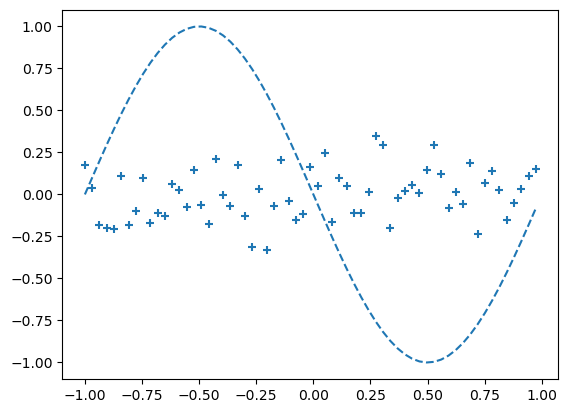

Epoch:0/2001 Error:0.2880491983103639


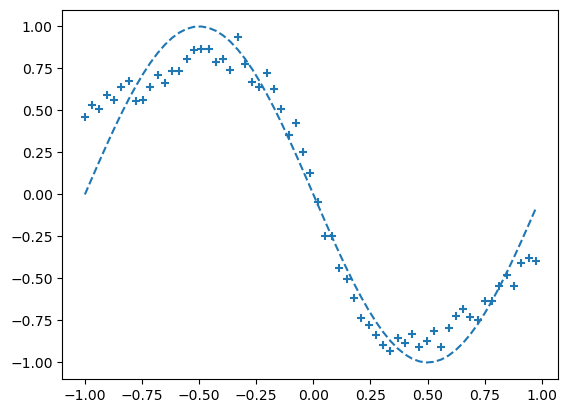

Epoch:200/2001 Error:0.012708382500682637


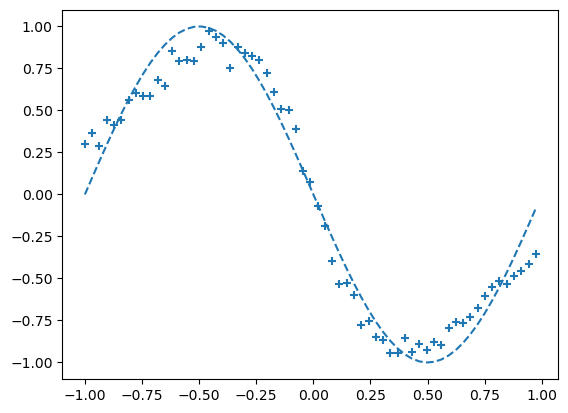

Epoch:400/2001 Error:0.008274493037870643


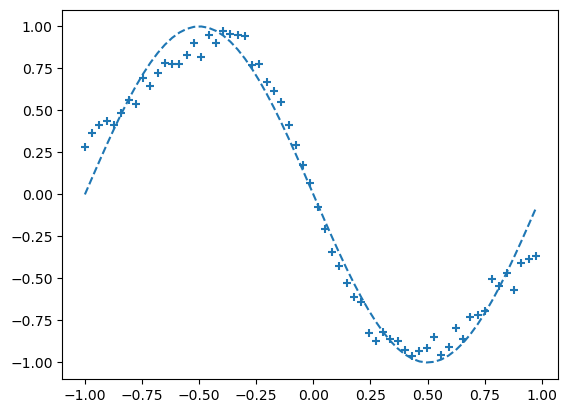

Epoch:600/2001 Error:0.006461750686148773


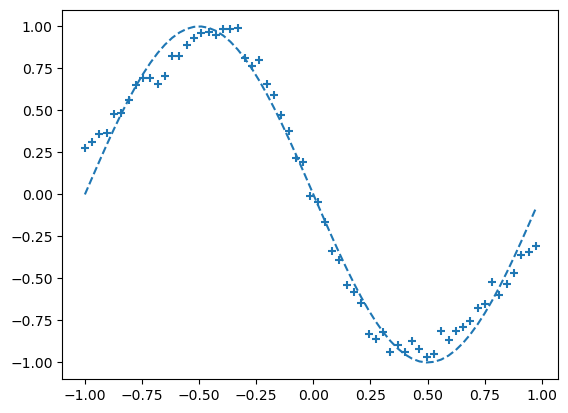

Epoch:800/2001 Error:0.00482899602273441


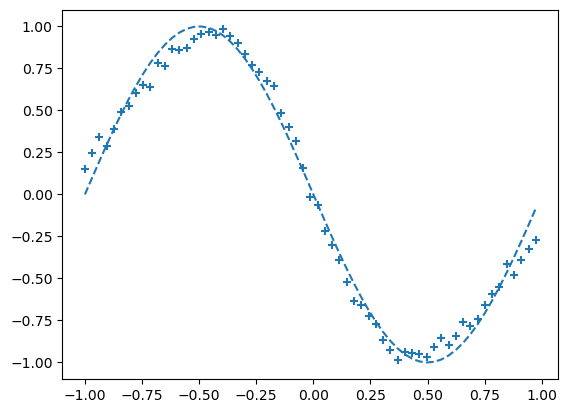

Epoch:1000/2001 Error:0.0030516515586630527


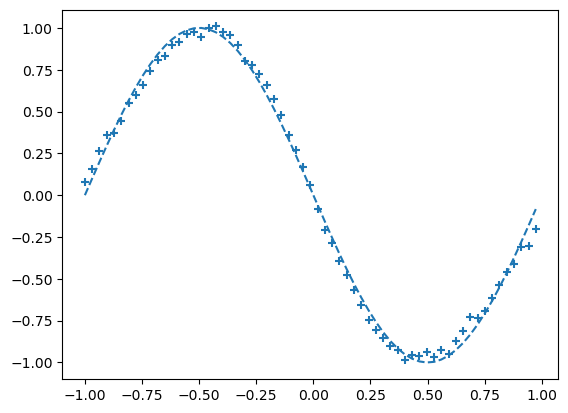

Epoch:1200/2001 Error:0.0011266209005615807


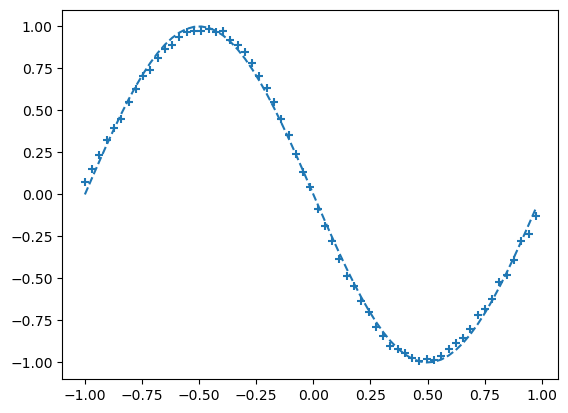

Epoch:1400/2001 Error:0.0004038916096060786


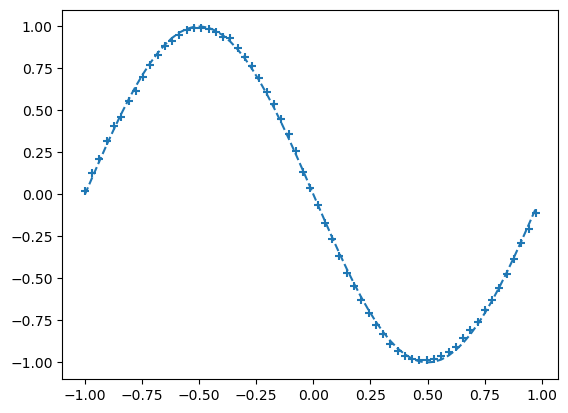

Epoch:1600/2001 Error:0.00013564570078056446


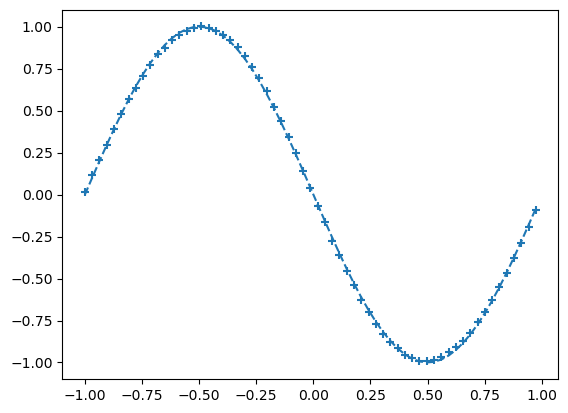

Epoch:1800/2001 Error:5.389763381961253e-05


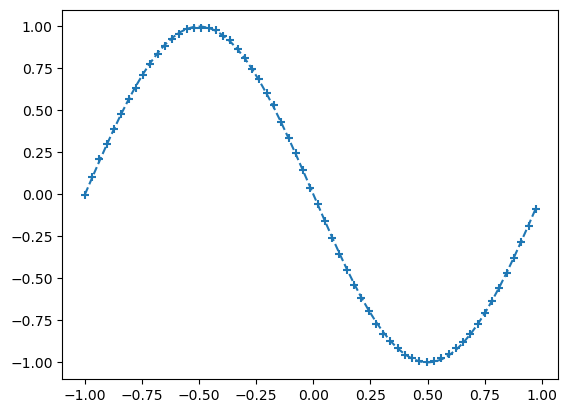

Epoch:2000/2001 Error:1.8895938908485933e-05


In [8]:
#학습루틴 SGD
for i in range(epoch):
    index_random = np.arange(n_data) 
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = [] #빈배열 생성
    plot_y = [] #빈배열 생성
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx] #타겟
        
        #순전파
        middle_layer.forward(x.reshape(1, 1)) #행 1개,열 1개
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1, 1))
        middle_layer.backward(output_layer.grad_x)
        
        #가중치, 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) # 1차원으로 알아서 계산할것
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle = 'dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch:' + str(i) + '/' + str(epoch), 'Error:' + str(total_error/n_data))